# Variational Quantum Eigensolver

The $\textbf{variational quantum eigensolver}$ [1] is a hybrid quantum-classical algorithm that estimates the ground-state energy of a Hamiltonian.

VQE is based on the variational principle of quantum mechanics which is explained and proven below:

Consider a Hamiltonian $H$ that has eigen-energies $E_n$ and corresponding eigenstates $|n\rangle$. That is:

$$ H|n\rangle=E_n|n\rangle $$
for $n=0,2,...,N-1$.

Consider a normalized state $|\psi(\theta)\rangle$ paramaterized by a set of parameters $\theta=\{\theta_n\}_{n}$. We can expand this state in terms of the eigenvectors of the Hamiltonian as

$$ |\psi(\theta)\rangle=\sum_nc_n|n\rangle $$

Then, the expectation value of the Hamiltonian in this state is

$$
\begin{align*}
\langle\psi(\theta)|H|\psi(\theta)\rangle 
&=\sum_{n,m}c_n^*c_m\langle n|H|m \rangle \\
&=\sum_{n,m}c_n^*c_m\langle n|E_m|m \rangle \\
&=\sum_{n,m}c_n^*c_mE_m\langle n|m \rangle \\
&=\sum_{n,m}c_n^*c_mE_m \delta_{nm}\\
&=\sum_{n}|c_n|^2E_n \\
&\geq\sum_{n}|c_n|^2E_0 \\
&= E_0\sum_{n}|c_n|^2 \\
&= E_0 \\
\end{align*}
$$

Therefore,

$$ \min_{\theta} \ \langle\psi(\theta)|H|\psi(\theta)\rangle  = E_0 $$

In VQE: 
- a $\textbf{quantum computer}$ is used to calculate $\langle\psi(\theta)|H|\psi(\theta)\rangle$ while
- a $\textbf{classical computer}$ is used to minimize over the set of parameters $\theta$

# Ising Model

The $\textbf{Ising Model}$ [2] is used to model the interaction of spins in systems like magnets.

As a pedagogical example, we'll use VQE to solve a simple two-spin Ising Hamiltonian:

$$H=X\otimes X+Y\otimes Y+Z\otimes Z$$

## Classical Computing Solution

First we import:

In [1]:
import numpy as np

Then we define the Pauli matrices:

In [2]:
X = np.matrix([[0,1],[1,0]],dtype=complex)
Y = np.matrix([[0,-1j],[1j,0]],dtype=complex)
Z = np.matrix([[1,0],[0,-1]],dtype=complex)

Then we define the Hamiltonian:

In [3]:
H = np.kron(X,X)+np.kron(Y,Y)+np.kron(Z,Z)

Then we get the eigenvalue and eigenvectors

In [4]:
e_val, e_vec = np.linalg.eig(H)

print('Eigenvalues:')
print(np.real(e_val))
print('Eigenvectors:')
print(np.real(e_vec))

Eigenvalues:
[ 1. -3.  1.  1.]
Eigenvectors:
[[-0.         -0.          1.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [-0.         -0.          0.          1.        ]]


It can be seen that the ground state energy (minimum energy eigenvalue) is $E_0=-3$ with corresponding eigenvector:

$$ 
|\psi_0\rangle =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 \\ -1 \\ 1 \\ 0
\end{pmatrix}
= \frac{|10\rangle-|01\rangle}{\sqrt{2}}
$$

## Variational Solution

We're going to base our variational state of the Bethe ansatz [3] and choose

$$ 
|\psi(\theta)\rangle=\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
$$

We can now take the expectation value of $H$ is our variational state. To do this, first note that

$$
\begin{align*}
(X \otimes X) |\psi(\theta)\rangle 
&= (X \otimes X)\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
= \frac{|01\rangle+e^{i\theta}|10\rangle}{\sqrt{2}}
\\
(Y \otimes Y) |\psi(\theta)\rangle 
&= (Y \otimes Y)\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
= \frac{|01\rangle+e^{i\theta}|10\rangle}{\sqrt{2}}
\\
(Z \otimes Z) |\psi(\theta)\rangle 
&= (Z \otimes Z)\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
= -\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
\end{align*}
$$

and therefore

$$
\begin{align*}
H|\psi(\theta)\rangle 
&=
\left(X \otimes X + Y \otimes Y + Z \otimes Z\right)|\psi(\theta)\rangle 
\\
&=\frac{\left(2e^{i\theta}-1\right)|10\rangle+\left(2-e^{i\theta}\right)|01\rangle}{\sqrt{2}}
\end{align*}
$$

Thus, the expectation value is

$$
\begin{align*}
\langle\psi(\theta)|H|\psi(\theta)\rangle
&=
\frac{\langle10|+e^{-i\theta}\langle01|}{\sqrt{2}}
\left[\frac{\left(2e^{i\theta}-1\right)|10\rangle+\left(2-e^{i\theta}\right)|01\rangle}{\sqrt{2}}\right]
\\
&=\frac{\left(2e^{i\theta}-1\right)+\left(2e^{-i\theta}-1\right)}{2}
\\
&=\cos(\theta)-1
\end{align*}
$$

To find the minimum, note that 

$$
0 = \frac{d}{d\theta}|\psi(\theta)\rangle = -2\sin(\theta)
$$

which implies that there are extrema at $\theta=0,\pi$. The minimum will be when the second derivative is positive

$$
0 < \frac{d^2}{d\theta^2}=-2\cos(\theta)
$$

Between $0$ and $\pi$, the value of $\theta$ that satisfies this is $\pi$. Thus, the eigenstate that minimizes the energy is

$$
|\psi(\pi)\rangle 
=\frac{|10\rangle+e^{i\pi}|01\rangle}{\sqrt{2}}
=\frac{|10\rangle-|01\rangle}{\sqrt{2}}
$$

and the minimum energy is

$$
\min_{\theta}\langle\psi(\theta)|H|\psi(\theta)\rangle
=\langle\psi(\pi)|H|\psi(\pi)\rangle
=2\cos(\pi)-1
=-3
$$

both of which agree with the classical computing solution.

## Quantum Computing Solution

First we import and define:

In [5]:
from qiskit import *

Now, we need to initialize the state

$$|\psi(\theta)\rangle=\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}$$

on a quantum computer. This can be done with the following circuit:

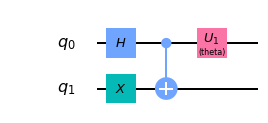

In [6]:
# Create quantum circuit with 2 qubits
q = QuantumRegister(2, 'q')
circ = QuantumCircuit(q)

# Paramater
theta = 'theta'

# Add quantum gates
circ.x(q[1])
circ.h(q[0])
circ.cx(q[0],q[1])
circ.u1(theta,q[0])

circ.draw(output='mpl')

This can be seen by walking through the circuit step by step:

$$
\begin{align*}
|00\rangle
&\to\left[X \otimes I\right]|00\rangle = |10\rangle \\
&\to\left[I \otimes H\right]|10\rangle = \frac{|10\rangle+|11\rangle}{\sqrt{2}} \\
&\to \text{CNOT}_{01}\left[\frac{|10\rangle+|11\rangle}{\sqrt{2}}\right]=\frac{|10\rangle+|01\rangle}{\sqrt{2}} \\
&\to \left[I\otimes U_1(\theta)\right]\left[\frac{|10\rangle+|01\rangle}{\sqrt{2}}\right]
=\frac{|10\rangle+e^{i\theta}|01\rangle}{\sqrt{2}}
\end{align*}
$$

So, we define a function that creates the quantum circuit tha prepares this initiale state, paramaterized by $\theta$:

In [7]:
def initialize_state(theta):
    
    # Create quantum circuit with 2 qubits
    q = QuantumRegister(2,'q')
    c = ClassicalRegister(2,'c')
    circ = QuantumCircuit(q,c)

    # Prepare initial state
    circ.x(q[1])
    circ.h(q[0])
    circ.cx(q[0],q[1])
    circ.u1(theta,q[0])
    
    return circ,q,c

## Expectation Values

Recall that we can write expectation values in terms of probabilities. For our example, we have that

$$
\begin{align*}
\langle\psi|(X \otimes X)|\psi\rangle
&=P_{|\psi\rangle_x}(00)-P_{|\psi\rangle_x}(01)-P_{|\psi\rangle_x}(10)+P_{|\psi\rangle_x}(11) \\
\langle\psi|(Y \otimes Y)|\psi\rangle
&=P_{|\psi\rangle_y}(00)-P_{|\psi\rangle_y}(01)-P_{|\psi\rangle_y}(10)+P_{|\psi\rangle_y}(11) \\
\langle\psi|(Z \otimes Z|\psi\rangle 
&=P_{|\psi\rangle_z}(00)-P_{|\psi\rangle_z}(01)-P_{|\psi\rangle_z}(10)+P_{|\psi\rangle_z}(11) 
\end{align*}
$$

where bases have been rotated as follows

$$
\begin{align*}
|\psi\rangle_x&=(H \otimes H)|\psi\rangle \\
|\psi\rangle_y&=(HS^{\dagger} \otimes HS^{\dagger})|\psi\rangle \\
|\psi\rangle_z&=|\psi\rangle
\end{align*}
$$

Therefore, we write a function that takes in a circuit that prepares $|\psi\rangle$ and appends the necessary basis rotation gates for a given observable so that expectation values may be extracted from runs of the circuit.

In [8]:
def rotate(obs,circ,q,c):
    
    # Rotate basis
    if obs == 'zz':
        pass
    elif obs == 'xx':
        circ.h(q)
    elif obs == 'yy':
        circ.sdg(q)
        circ.h(q)
        
    return circ,q,c

No we make a function that calculates the expectation value from a rotated circuit for a given obervable by creating a linear combination of the probabilities using the definitions above:

In [9]:
def lin_comb(circ,q,c):
    
    # Measure
    circ.measure(q,c)
    
    # Run the circuit
    shots = 1000 # Number of times to run the circuit
    backend = Aer.get_backend('qasm_simulator') # Chose to simulate the circuit
    sim = execute(circ, backend, shots = shots) # Simulate the circuit
    result = sim.result() # Get the results
    counts = result.get_counts(circ) # Get how many counts there are for each measurement

    # Initialize expectation value to zero
    exp = 0 
    # Add and subtract estimated probabilites to get expectation value
    if '00' in counts:
        exp += counts['00']
    if '01' in counts:
        exp -= counts['01']
    if '10' in counts:
        exp -= counts['10']
    if '11' in counts:
        exp += counts['11']
    
    return exp/shots

Now we make a function that puts it all together: taking in the initial parameter and observable, and outputing the expectation value of that observable in the state paramaterized by that initial parameter:

In [10]:
def expect(theta,obs):
    
    # Initialize state
    circ,q,c = initialize_state(theta)
    
    # Rotate to appropriate basis
    circ,q,c = rotate(obs,circ,q,c)
    
    # Get expectation value
    exp = lin_comb(circ,q,c)
    
    return exp

Now we create a function to calculate the energy by summing together the expectation values of each of the terms in the Hamiltonians:

In [11]:
def energy(theta):
    
    energy = expect(theta,'xx') + expect(theta,'yy') + expect(theta,'zz')
    
    return energy

We can check that our function is working correctly by checking the expectation value of eigenstates

In [12]:
print('Expectation value of state with theta = 0:',energy(0))
print('Expectation value of state with theta = pi:',energy(np.pi))

Expectation value of state with theta = 0: 1.0
Expectation value of state with theta = pi: -3.0


We can now perform VQE by feeding the expectation value to a classical minimizer:

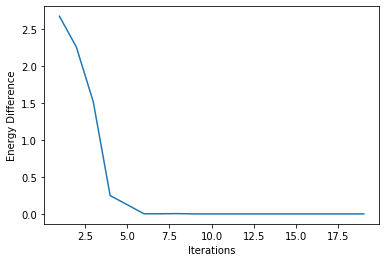

E_true -3
E_vqe -3.0
theta_true: 3.141592653589793
theta_vqe= 3.1368149201574553


In [16]:
import scipy as sp
from IPython.display import clear_output
import matplotlib.pyplot as plt

diff = []
def callback(x):
    diff.append(energy(x)-true_eval)
    itr = np.linspace(1,len(diff),len(diff))
    plt.plot(itr,diff)
    plt.xlabel('Iterations')
    plt.ylabel('Energy Difference')
    clear_output(wait=True)
    plt.show()

# Actual minimum eigenvalue from classical computation
true_eval = -3

# Initialize paramater
theta = np.random.uniform(0,2*np.pi)

# Minimize
opt = sp.optimize.minimize(energy, x0=theta, method="Nelder-Mead", callback=callback)

theta_est = opt.x[0]

print("E_true",true_eval)
print("E_vqe",energy(theta_est))
print("theta_true:",pi)
print("theta_vqe=",theta_est)

## References:
[1] https://arxiv.org/pdf/1304.3061.pdf

[2] https://en.wikipedia.org/wiki/Ising_model

[3] https://arxiv.org/pdf/cond-mat/9809162.pdf